<a href="https://colab.research.google.com/github/healthonrails/annolid/blob/main/docs/tutorials/Annolid_on_Detectron2_Tutorial.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Annolid on Detectron2 Tutorial 1 : Introduction to Detectron2

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

Welcome to Annolid on detectron2! This is modified from the official colab tutorial of detectron2. Here, we will go through some basics usage of detectron2, including the following:
* Run inference on images or videos, with an existing detectron2 model
* Train a detectron2 model on a new dataset

You can make a copy of this tutorial by "File -> Open in playground mode" and play with it yourself. __DO NOT__ request access to this tutorial.


# Install detectron2

In [1]:
# Is running in colab or in jupyter-notebook
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
# install dependencies: 
!pip install pyyaml==5.3
import torch, torchvision
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


torch:  1.10 ; cuda:  cu102


Defaulting to user installation because normal site-packages is not writeable


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.10/index.html



× The package index page being used does not have a proper HTML doctype declaration.
╰─> Problematic URL: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.10/index.html

note: This is an issue with the page at the URL mentioned above.
hint: You might need to reach out to the owner of that package index, to get this fixed. See https://github.com/pypa/pip/issues/10825 for context.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/6.6 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/6.6 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/6.6 MB 46.9 MB/s eta 0:00:01

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/6.6 MB 1.7 MB/s eta 0:00:04

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/6.6 MB 1.9 MB/s eta 0:00:04

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.7/6.6 MB 3.3 MB/s eta 0:00:02

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.7/6.6 MB 3.3 MB/s eta 0:00:02

     ━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/6.6 MB 4.9 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 2.7/6.6 MB 8.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 5.5/6.6 MB 13.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 6.1/6.6 MB 13.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.8 MB/s eta 0:00:00


  Using cached pycocotools-2.0.4.tar.gz (106 kB)


  Installing build dependencies ... -

 \

 |

 /

 -

 \

 |

 /

 -

 \

 |

 done


  Getting requirements to build wheel ... -

 \

 | done


  Preparing metadata (pyproject.toml) ... -

 \

 |

 done


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 KB 3.6 MB/s eta 0:00:00


  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)


  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/4.3 MB ? eta -:--:--

     ━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/4.3 MB 47.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 7.9 MB/s eta 0:00:00


  Preparing metadata (setup.py) ... -

 done


  Using cached cloudpickle-2.0.0-py3-none-any.whl (25 kB)


  Using cached black-21.4b2-py3-none-any.whl (130 kB)


  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 21.0 MB/s eta 0:00:00


  Using cached iopath-0.1.9-py3-none-any.whl (27 kB)


  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/764.9 KB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.9/764.9 KB 60.7 MB/s eta 0:00:00


  Using cached antlr4-python3-runtime-4.8.tar.gz (112 kB)


  Preparing metadata (setup.py) ... -

 done


 done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20220414-py3-none-any.whl size=61212 sha256=4cb72392a7e362d58febb42094258d25500f2b6393712de347918ee33a4d679a
  Stored in directory: /home/jeremy/.cache/pip/wheels/3c/f1/3a/d775ab1ab50edd8ddf8a14992295a81195e0542027f8df3f3c


 done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=7937ed7ea7b0bb74bcd3cb8e1c1df20a81d636033632722afb67023fc06cf12d
  Stored in directory: /home/jeremy/.cache/pip/wheels/c8/d0/ab/d43c02eaddc5b9004db86950802442ad9a26f279c619e28da0


 \

 |

 /

 -

 \

 |

 /

 done
  Created wheel for pycocotools: filename=pycocotools-2.0.4-cp38-cp38-linux_x86_64.whl size=418859 sha256=0bdca99493d5725504f3c2bf5a17fbd75c67085c23d61bc3811e3c143ff9ba15
  Stored in directory: /home/jeremy/.cache/pip/wheels/dd/e2/43/3e93cd653b3346b3d702bb0509bc611189f95d60407bff1484
Successfully built fvcore antlr4-python3-runtime pycocotools


  Attempting uninstall: importlib-resources
    Found existing installation: importlib-resources 5.7.1


    Uninstalling importlib-resources-5.7.1:
      Successfully uninstalled importlib-resources-5.7.1


  Attempting uninstall: black
    Found existing installation: black 22.1.0


    Uninstalling black-22.1.0:


      Successfully uninstalled black-22.1.0


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# import some common libraries
import json
import os
import cv2
import random
import glob
import numpy as np
if IN_COLAB:
  from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [5]:
# is there a gpu
if torch.cuda.is_available():
    GPU = True
    print('gpu available')
else:
    GPU = False
    print('no gpu')

gpu available


## Upload a labeled dataset.
The following code is expecting the dataset in the COCO format to be in a ***.zip*** file. For example: ```sample_dataset.zip``` \


In [6]:
!pip install gdown 
!gdown --id 1fUXCLnoJ5SwXg54mj0NBKGzidsV8ALVR

Defaulting to user installation because normal site-packages is not writeable


  Installing build dependencies ... -

 \

 |

 done


  Getting requirements to build wheel ... -

 \

 | done


  Preparing metadata (pyproject.toml) ... -

 \

 | done


  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


 \

 |

 /

 - done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=ed647795ee86c4783adbbd265cc5cf044bf0ae6be6a1943d9399a789c89b664f
  Stored in directory: /home/jeremy/.cache/pip/wheels/7b/7b/5d/656f46cd6889e4c93977be9586901d0adc1271b2d876c84c96


Successfully built gdown


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


/home/jeremy/.local/lib/python3.8/site-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


Downloading...
From: https://drive.google.com/uc?id=1fUXCLnoJ5SwXg54mj0NBKGzidsV8ALVR
To: /home/jeremy/Documents/annolid/book/tutorials/novelctrlk6_8_coco_dataset.zip


  0%|                                               | 0.00/10.3M [00:00<?, ?B/s]

100%|██████████████████████████████████████| 10.3M/10.3M [00:00<00:00, 90.4MB/s]


In [7]:
if IN_COLAB:
    dataset = '/content/novelctrlk6_8_coco_dataset.zip'
else:
    dataset = 'novelctrlk6_8_coco_dataset.zip'

### Note1: If you want to use your own dataset instead of the demo one, please uncomment and edit the following code.

### Note2: please make sure there is no white space in your file path if you encounter file not found issues.

In [8]:
# if IN_COLAB:
#     from google.colab import files
#     uploaded = files.upload()
# else:
#     from ipywidgets import FileUpload
#     from IPython.display import display
#     !jupyter nbextension enable --py widgetsnbextension
#     uploaded = FileUpload()

# display(uploaded)

In [9]:
# if IN_COLAB:
#     dataset =  list(uploaded.keys())[0]
# else:
#     dataset = list(uploaded.value.keys())[0]


If your dataset has the same name as the file you uploaded, you do not need to manually input the name (just run the next cells). **Otherwise, you need to replace DATASET_NAME and DATASET_DIR with your own strings like `DATASET_NAME = "NameOfMyDataset"` and `DATASETDIR="NameOfMyDatasetDirectory"`**. To do that, uncomment the commented out cell below and replace the strings with the appropriate names

In [10]:
# DATASET_NAME = 'NameOfMyDataset' 
# DATASET_DIR = 'NameOfMyDatasetDirectory'

In [11]:
if IN_COLAB:
    !unzip $dataset -d /content/
else:
    !unzip -o $dataset -d .

Archive:  novelctrlk6_8_coco_dataset.zip
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00001416_41.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00004233_81.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00004515_22.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00000636_6.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00006297_11.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00006818_79.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00006056_25.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00006094_12.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00004340_96.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00000557_50.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00000979_94.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/valid/JPEGImages/00005018_19.jpg  
  inflating: ./novelctrlk6_8_coco_da


  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00002825_40.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00002247_29.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00003100_30.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00001922_57.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00001320_92.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00006299_63.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00000952_60.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00000842_70.jpg  
  inflating: ./__MACOSX/novelctrlk6_8_coco_dataset/train/JPEGImages/._00000842_70.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00002295_32.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00004117_59.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00003976_44.jpg  
  inflating: ./novelctrlk6_8_coco_dataset/train/JPEGImages/00004

In [12]:
DATASET_NAME = DATASET_DIR = f"{dataset.replace('.zip','')}"

# Run a pre-trained detectron2 model

First, we check a random selected image from our training dataset:

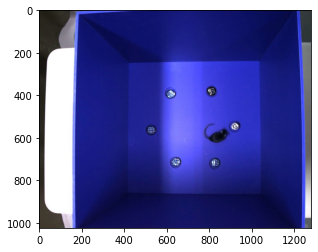

In [13]:
# select and display one random image from the training set
img_file = random.choice(glob.glob(f"{DATASET_DIR}/train/JPEGImages/*.*"))
im = cv2.imread(img_file)
if IN_COLAB:
    cv2_imshow(im)
else:
    plt.imshow(im)

Then, we create a Detectron2 config and a detectron2 `DefaultPredictor` to run inference on this image.

In [14]:
cfg = get_cfg()

In [15]:
if GPU:
    pass
else:
    cfg.MODEL.DEVICE='cpu'

In [16]:
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1  # set threshold for this model
# Find a model from Detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [17]:
# look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 6, 74, 74, 65, 74, 68], device='cuda:0')
Boxes(tensor([[ 100.5904,   16.4716, 1262.0560,  977.0276],
        [ 504.0177,  541.5104,  551.6971,  589.2094],
        [ 898.6787,  518.7311,  947.8806,  568.1455],
        [  19.0260,  140.1515,  163.2243,  981.9127],
        [ 788.5672,  356.4314,  832.5961,  404.7740],
        [ 121.0352,    0.0000, 1254.3234,  988.9520]], device='cuda:0'))


In [18]:
outputs['instances'].pred_masks

tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [

In [19]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

namespace(name='coco_2017_train',
          json_file='datasets/coco/annotations/instances_train2017.json',
          image_root='datasets/coco/train2017',
          evaluator_type='coco',
          thing_dataset_id_to_contiguous_id={1: 0,
                                             2: 1,
                                             3: 2,
                                             4: 3,
                                             5: 4,
                                             6: 5,
                                             7: 6,
                                             8: 7,
                                             9: 8,
                                             10: 9,
                                             11: 10,
                                             13: 11,
                                             14: 12,
                                             15: 13,
                                             16: 14,
                                   

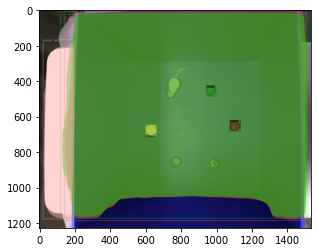

In [20]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
if IN_COLAB:
    cv2_imshow(out.get_image()[:, :, ::-1])
else:
    plt.imshow(out.get_image()[:, :, ::-1])

As we can see, the network doesn't detect what we want. That is expected as we have not fine-tuned the network with our custom dataset. We are going to do that in the next steps.